In [1]:
# MASLD Awareness Tracker - Results Notebook
"This project tracks and analyzes public and scientific awareness of Metabolic Dysfunction-Associated Steatotic Liver Disease (MASLD) in relation to FDA drug approvals of Resmetirom and GLP-1 agonists, examining impacts across search trends, scientific literature, social media, stock markets, and news media."

import os
import sys
from pathlib import Path

# Set up matplotlib for notebook display
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

# Add project root to path for imports
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from config import DATA_DIR, RESULTS_DIR, STUDY_START_DATE, STUDY_END_DATE, FDA_EVENT_DATES

# NOTE: All required packages (including gdown) are installed via requirements.txt

In [2]:
# Create directories
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"Study Period: {STUDY_START_DATE} to {STUDY_END_DATE}")
print(f"FDA Events: {FDA_EVENT_DATES}")
print(f"Data Sources: Google Trends, Stock Data, Reddit, PubMed, Media Cloud")

Study Period: 2023-01-01 to 2025-10-28
FDA Events: {'Resmetirom Approval': '2024-03-14', 'GLP-1 Agonists Approval': '2025-08-15'}
Data Sources: Google Trends, Stock Data, Reddit, PubMed, Media Cloud


In [2]:
# --- Core Analysis Pipeline ---
print("=== CORE ANALYSIS PIPELINE ===")
from load import get_google_trends_data, get_stock_data, get_reddit_data, get_pubmed_data, get_media_cloud_data
from process import process_google_trends, process_stock_data, process_reddit_data, process_pubmed_data
from analyze import analyze_google_trends, analyze_stock_and_events, analyze_reddit_sentiment, analyze_pubmed_publication_rate

=== CORE ANALYSIS PIPELINE ===


In [3]:
# Install required package for Google Drive fallback
!pip install gdown

In [6]:
# Check if gdown is available for Google Drive fallback
try:
    import gdown
    gdown_available = True
    print("gdown package available for Google Drive fallback")
except ImportError:
    gdown_available = False
    print("gdown package not available - install with: pip install gdown")

gdown package available for Google Drive fallback


=== GOOGLE TRENDS ANALYSIS ===
Attempting API data retrieval...

[Loading] Fetching Google Trends data for: ['MASLD', 'NAFLD', 'Rezdiffra', 'Wegovy', 'Ozempic']
[ERROR] Failed to fetch Google Trends data: The request failed: Google returned a response with code 429
API approach failed: API returned no data
Falling back to Google Drive data...


Downloading...
From: https://drive.google.com/uc?id=1lrov39Ww1Zp2kJTu4zb1yr3Q2j69H1rX
To: C:\Users\somay\AppData\Local\Temp\tmpvb0fxy5i.csv
100%|██████████| 3.80k/3.80k [00:00<00:00, 18.3MB/s]

Google Trends data loaded from Google Drive
[Processing] Cleaning Google Trends data...
  > Trends data ready. Shape: (148, 5)
Google Trends data shape: (148, 5)
First 3 rows of Google Trends data:
            MASLD  NAFLD  Rezdiffra  Wegovy  Ozempic
date                                                
2023-01-01      0     16          0      41       44
2023-01-08      0     19          0      22       44
2023-01-15      0     18          0      24       52

[Analysis] Analyzing Google Trends...


<Figure size 1200x600 with 0 Axes>

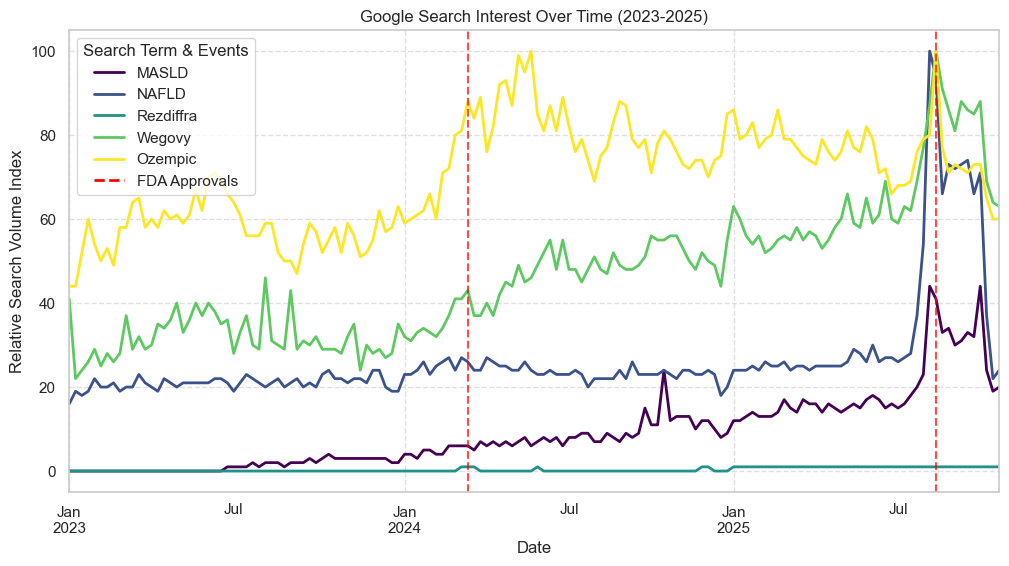

  > Displayed Google Trends plot in notebook


<Figure size 1200x600 with 0 Axes>

Google Trends analysis completed using Google Drive data


In [4]:
# Google Trends Analysis (with API first, fallback to G-Drive)
print("=== GOOGLE TRENDS ANALYSIS ===")

# Method 1: API Approach
print("Attempting API data retrieval...")
try:
    trends_data = get_google_trends_data()
    if trends_data is not None:
        processed_trends = process_google_trends(trends_data)
        analyze_google_trends(processed_trends, notebook_plot=True)
        print("Google Trends analysis completed via API")
    else:
        raise Exception("API returned no data")

except Exception as e:
    print(f"API approach failed: {e}")

    # Method 2: Google Drive Fallback
    print("Falling back to Google Drive data...")
    try:
        from config import load_google_trends_from_drive
        drive_data = load_google_trends_from_drive()

        if drive_data is not None:
            processed_trends = process_google_trends(drive_data)

            # Add Data Preview:
            print(f"Google Trends data shape: {processed_trends.shape}")
            print("First 3 rows of Google Trends data:")
            print(processed_trends.head(3))
            print("="*50)

            # Import and configure matplotlib explicitly
            import matplotlib.pyplot as plt
            %matplotlib inline

            # Run analysis and force display
            analyze_google_trends(processed_trends, notebook_plot=True)

            # Explicitly show the plot
            plt.tight_layout()
            plt.show()
            print("Google Trends analysis completed using Google Drive data")
        else:
            print("Google Drive approach failed")

    except Exception as drive_error:
        print(f"Google Drive approach failed: {drive_error}")

In [8]:
# REDDIT ANALYSIS - FULL API DEMONSTRATION
# This block demonstrates complete API data collection and processing
# Note: This may take 5-10 minutes to complete due to API rate limits
# For faster testing, use the "QUICK ANALYSIS" block below

print("=== REDDIT ANALYSIS - FULL API DEMONSTRATION ===")
print("This demonstrates complete Reddit API data collection and processing")
print("Note: This may take several minutes due to API rate limits")

# Method 1: Complete API Approach
print("Starting API data collection...")
try:
    reddit_data = get_reddit_data()
    if reddit_data is not None:
        print("API data collection completed successfully")
        print(f"Collected {len(reddit_data)} records from Reddit API")

        # Process the API data
        print("Processing API data for sentiment analysis...")
        processed_reddit = process_reddit_data(reddit_data)

        # Generate analysis and visualizations
        print("Generating sentiment analysis and visualizations...")
        analyze_reddit_sentiment(processed_reddit, notebook_plot=True)

        print("Reddit sentiment analysis completed using full API pipeline")
        print("This demonstrates successful API integration and data processing")

    else:
        print("API returned no data - this demonstrates API limitations")
        raise Exception("API returned no data")

except Exception as e:
    print(f"API approach encountered issues: {e}")
    print("This demonstrates real-world API challenges that require fallback solutions")
    print("For reliable analysis, use the QUICK ANALYSIS block with pre-collected data")

=== REDDIT ANALYSIS - FULL API DEMONSTRATION ===
This demonstrates complete Reddit API data collection and processing
Note: This may take several minutes due to API rate limits
Starting API data collection...

[Loading] Connecting to Reddit API and fetching data...
  > Collecting hot posts from r/NAFLD...
  > Collecting hot posts from r/MASH...
  > Collecting hot posts from r/NASH...
  > Collecting hot posts from r/MASLD...
  > Collecting hot posts from r/obesity...
  > Searching r/Ozempic for term: 'NAFLD'...
  > Searching r/Ozempic for term: 'NASH'...
  > Searching r/Ozempic for term: 'MASLD'...
  > Searching r/Ozempic for term: 'fatty liver'...
  > Searching r/Ozempic for term: 'liver'...
  > Searching r/Ozempic for term: 'Semaglutide'...
  > Searching r/Wegovy for term: 'NAFLD'...
  > Searching r/Wegovy for term: 'NASH'...
  > Searching r/Wegovy for term: 'MASLD'...
  > Searching r/Wegovy for term: 'fatty liver'...
  > Searching r/Wegovy for term: 'liver'...
  > Searching r/Wegovy 

=== REDDIT ANALYSIS - DEVELOPMENT VERSION ===
Using pre-collected data for fast, reliable analysis during development
Google Drive fallback ensures consistent results despite API limitations


Downloading...
From: https://drive.google.com/uc?id=1atMK_8axChUJMtzw8e7iv46tEehPTSsK
To: C:\Users\somay\AppData\Local\Temp\tmpsxu9uobs.csv
100%|██████████| 4.73M/4.73M [00:00<00:00, 9.63MB/s]


Reddit data loaded from Google Drive
Pre-collected data loaded: (9255, 14) records available
Data columns: ['subreddit', 'search_term', 'post_id', 'post_title', 'post_text', 'post_score', 'post_url', 'author', 'timestamp', 'num_comments', 'type', 'comment_id', 'comment_text', 'comment_score']
Data is already in processed format - proceeding directly to analysis
Data ready for analysis: (9255, 14)
Final columns: ['subreddit', 'search_term', 'post_id', 'post_title', 'post_text', 'post_score', 'post_url', 'author', 'timestamp', 'num_comments', 'type', 'comment_id', 'comment_text', 'comment_score']
[Processing] Performing Sentiment Analysis on Reddit data...
  > Reddit data with sentiment ready. Shape: (9146, 17)
Reddit data shape after processing: (9146, 6)
First 3 rows of Reddit sentiment data:
  subreddit           timestamp  sentiment_score
0     NAFLD 2025-10-27 12:41:03           0.9555
1     NAFLD 2025-10-27 14:33:51           0.8020
2     NAFLD 2025-10-27 19:43:16           0.2732


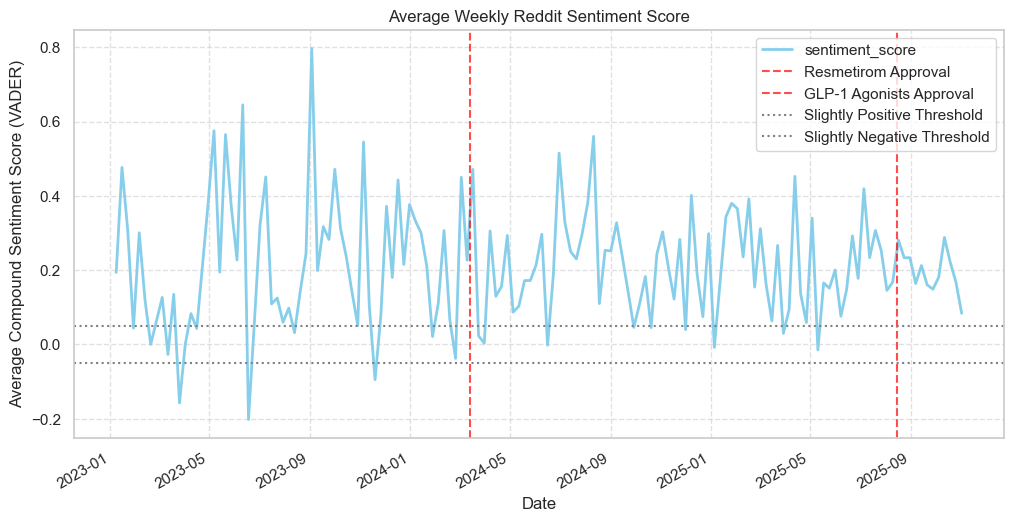

  > Displayed Reddit sentiment plot in notebook
Reddit sentiment analysis completed successfully using pre-collected data
This approach ensures consistent results for development and demonstration


In [5]:
# REDDIT ANALYSIS - DEVELOPMENT VERSION WITH PRE-COLLECTED DATA
# This block uses pre-collected Google Drive data for faster development and testing
# Rationale: Reddit API has rate limits and structural issues that slow down development
# Use this for reliable, fast analysis during project development

print("=== REDDIT ANALYSIS - DEVELOPMENT VERSION ===")
print("Using pre-collected data for fast, reliable analysis during development")
print("Google Drive fallback ensures consistent results despite API limitations")

try:
    from config import load_reddit_data_from_drive
    drive_data = load_reddit_data_from_drive()

    if drive_data is not None:
        print(f"Pre-collected data loaded: {drive_data.shape} records available")
        print(f"Data columns: {drive_data.columns.tolist()}")

        # Check if data is already in correct format
        if 'post_text' in drive_data.columns or 'text_to_analyze' in drive_data.columns:
            print("Data is already in processed format - proceeding directly to analysis")
            fixed_df = drive_data
        else:
            print("Data requires processing from nested format...")
            fixed_data = []
            for idx, row in drive_data.iterrows():
                for col in range(len(row)):
                    cell_data = row.iloc[col]  # Use .iloc to avoid the warning
                    if cell_data is not None and isinstance(cell_data, str) and cell_data.startswith('{'):
                        try:
                            import ast
                            parsed_data = ast.literal_eval(cell_data)
                            if isinstance(parsed_data, dict):
                                fixed_data.append(parsed_data)
                                break
                        except:
                            continue

            if fixed_data:
                import pandas as pd
                fixed_df = pd.DataFrame(fixed_data)
            else:
                print("Using original data structure since nested extraction failed")
                fixed_df = drive_data

        print(f"Data ready for analysis: {fixed_df.shape}")
        print(f"Final columns: {fixed_df.columns.tolist()}")

        # Process and analyze the data
        from process import process_reddit_data
        from analyze import analyze_reddit_sentiment

        processed_reddit = process_reddit_data(fixed_df)

        # Add Data Preview:
        print(f"Reddit data shape after processing: {processed_reddit.shape}")
        print("First 3 rows of Reddit sentiment data:")
        print(processed_reddit[['subreddit', 'timestamp', 'sentiment_score']].head(3))
        print("="*50)

        analyze_reddit_sentiment(processed_reddit, notebook_plot=True)
        print("Reddit sentiment analysis completed successfully using pre-collected data")
        print("This approach ensures consistent results for development and demonstration")
    else:
        print("Google Drive data unavailable - check file permissions")

except Exception as e:
    print(f"Development analysis failed: {e}")
    import traceback
    traceback.print_exc()


[Loading] Fetching PubMed article metadata...
  > Found 1000 articles. Fetching details...
[Success] PubMed data saved to: pubmed_masld_articles_20251112_2042.csv (1000 records)
[Processing] Cleaning PubMed data...
  > PubMed data ready. Shape: (623, 8)
Analyzing 623 total PubMed publications
PubMed data shape: (623, 5)
First 3 rows of PubMed data:
                                                 title publication_date  \
756  Glucagon-like Peptide-1 Receptor-based Therape...       2023-01-01   
733  Approach to the Patient With Nonalcoholic Fatt...       2023-01-01   
725  Comparative efficacy of diabetes medications o...       2023-01-01   

                                               journal  
756                                  Endocrine reviews  
733  The Journal of clinical endocrinology and meta...  
725  Clinics and research in hepatology and gastroe...  

[Analysis] Analyzing PubMed Publications...


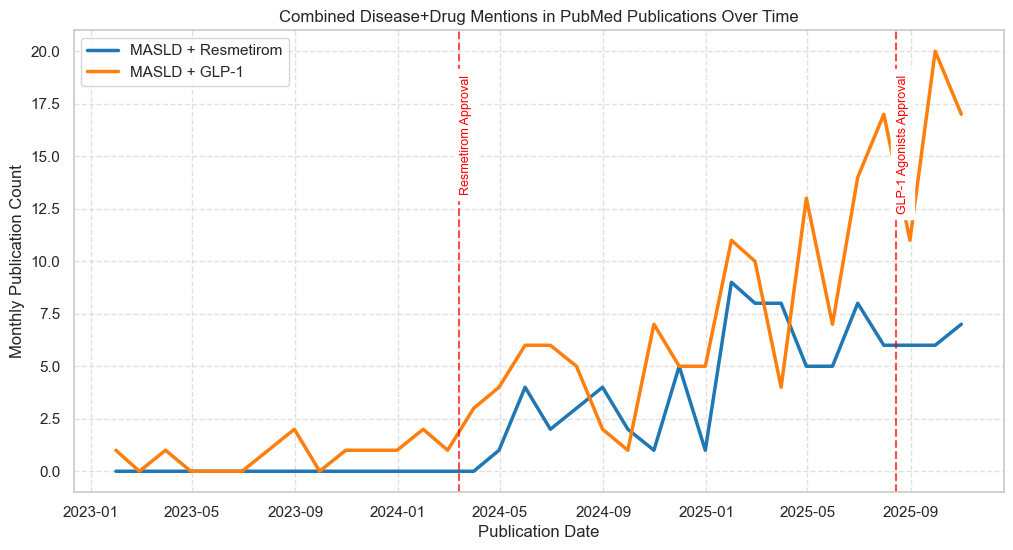

  > Displayed PubMed comparison plot in notebook
PubMed analysis completed


In [7]:
# PubMed
pubmed_data = get_pubmed_data()
if pubmed_data is not None:
    processed_pubmed = process_pubmed_data(pubmed_data)

    # Use ALL data for the analysis (not filtered)
    print(f"Analyzing {len(processed_pubmed)} total PubMed publications")

    # Add Data Preview:
    print(f"PubMed data shape: {processed_pubmed.shape}")
    print("First 3 rows of PubMed data:")
    print(processed_pubmed[['title', 'publication_date', 'journal']].head(3))
    print("="*50)

    # Process PubMed data using the publication rate analysis
    from analyze import analyze_pubmed_publication_rate
    analyze_pubmed_publication_rate(processed_pubmed, notebook_plot=True)
    print("PubMed analysis completed")


[Loading] Fetching stock data for: ['NVO', 'MDGL']


C:\Users\somay\PycharmProjects\FinalProject_Somaya_Albhaisi\src\load.py:221: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stocks = yf.download(
[*********************100%***********************]  2 of 2 completed

[Success] Stock data saved to: stock_prices.csv
[Processing] Cleaning Stock data...
Flattened columns: ['MDGL_Open', 'MDGL_High', 'MDGL_Low', 'MDGL_Close', 'MDGL_Volume', 'NVO_Open', 'NVO_High', 'NVO_Low', 'NVO_Close', 'NVO_Volume']
  > Stock data ready. Shape: (707, 2)
Stock data shape: (707, 2)
First 3 rows of stock data:
            NVO_Close  MDGL_Close
Date                             
2023-01-03  65.815369  285.420013
2023-01-04  65.724068  274.480011
2023-01-05  65.474174  271.709991
Stock price ranges:
NVO: $45.38 - $144.04
MDGL: $120.40 - $458.66

[Analysis] Analyzing Stock Data...


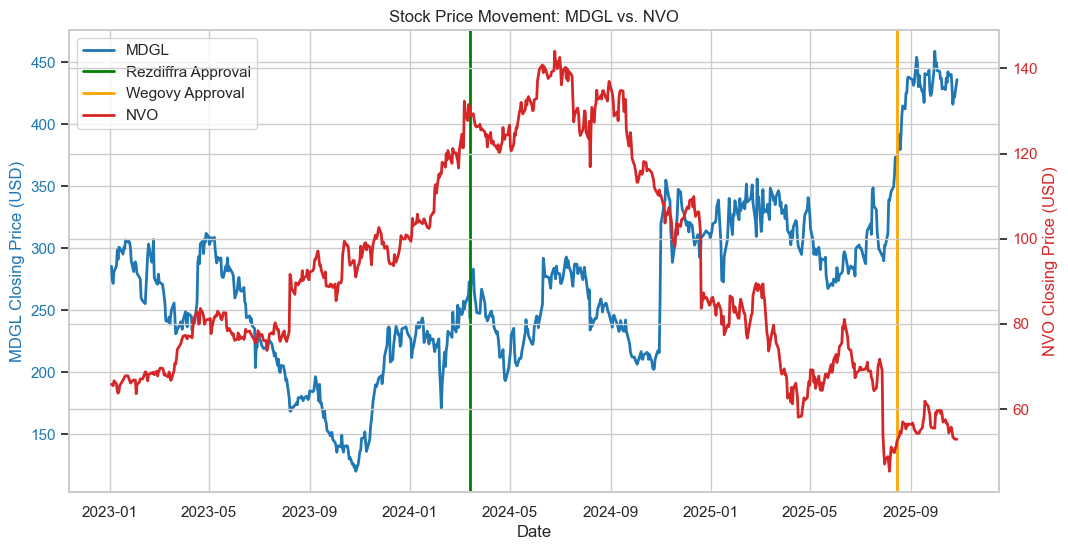

  > Displayed stock plot in notebook
  > MDGL Price Change around Resmetirom FDA: 4.06%
  > NVO Price Change around GLP-1 FDA: 6.30%
Stock analysis completed


In [8]:
# Stock
stock_data = get_stock_data()
if stock_data is not None:
    processed_stocks = process_stock_data(stock_data)

    # Add Data Preview:
    print(f"Stock data shape: {processed_stocks.shape}")
    print("First 3 rows of stock data:")
    print(processed_stocks.head(3))
    print("Stock price ranges:")
    print(f"NVO: ${processed_stocks['NVO_Close'].min():.2f} - ${processed_stocks['NVO_Close'].max():.2f}")
    print(f"MDGL: ${processed_stocks['MDGL_Close'].min():.2f} - ${processed_stocks['MDGL_Close'].max():.2f}")
    print("="*50)

    analyze_stock_and_events(processed_stocks, notebook_plot=True)
    print("Stock analysis completed")


[Media Cloud] Checking Media Cloud data availability...
[Media Cloud] Using existing data in: media_cloud
[Media Cloud] Data ready for analysis
Media Cloud datasets loaded:
  disease: 1036 time points
  disease: 100 unique sources
  resmetirom: 1036 time points
  resmetirom: 23 unique sources
  glp1: 1036 time points
  glp1: 100 unique sources
Running Media Cloud timeline analysis...

[Analysis] Analyzing Media Cloud Timeline...

[Media Cloud] Checking Media Cloud data availability...
[Media Cloud] Using existing data in: media_cloud
[Media Cloud] Data ready for analysis


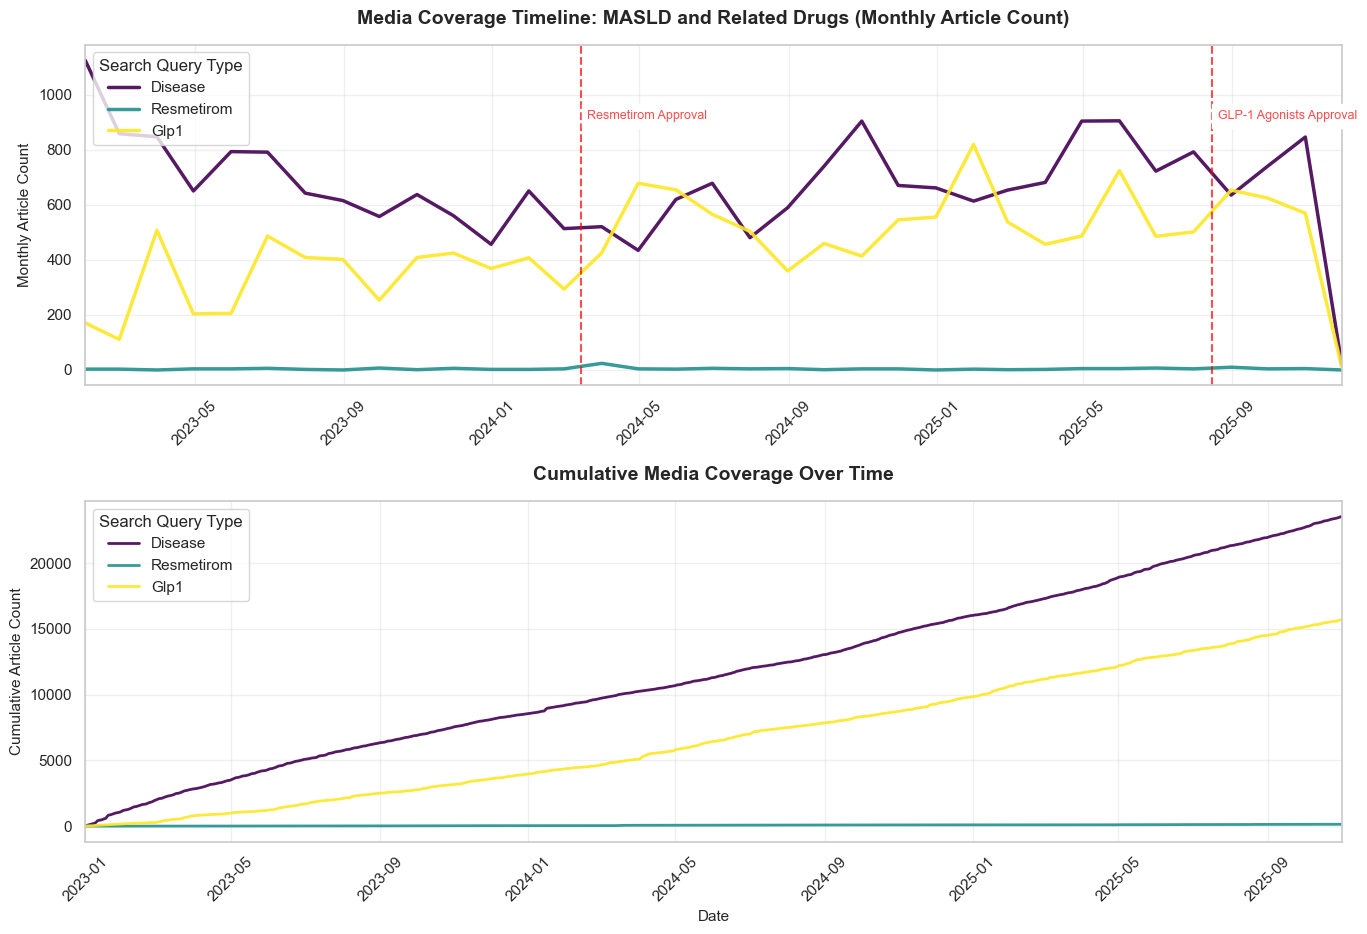

  > Displayed Media Cloud timeline in notebook
Media Cloud analysis completed!


In [9]:
# Media Cloud
MEDIA_CLOUD_ANALYSIS_SUBDIR = "media_cloud_analysis"

media_cloud_available = get_media_cloud_data()
if media_cloud_available:
    try:
        from analyze import analyze_media_cloud_timeline, analyze_media_cloud_sources

        # Add Data Preview:
        print("Media Cloud datasets loaded:")
        from analyze import load_media_cloud_datasets
        datasets = load_media_cloud_datasets()
        for name, data in datasets.items():
            if 'counts' in data:
                print(f"  {name}: {data['counts'].shape[0]} time points")
            if 'sources' in data:
                print(f"  {name}: {data['sources'].shape[0]} unique sources")
        print("="*50)

        print("Running Media Cloud timeline analysis...")
        timeline_results = analyze_media_cloud_timeline(notebook_plot=True)

        print("Media Cloud analysis completed!")

    except Exception as e:
        print(f"Error: {e}")